In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [2]:
basepath = '/Users/blandt/Desktop/Data/T2A/210804_nwg378_tom4,5,60,500'
paths = direcslist(basepath, 0)

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]
print(len(imgs))

6


In [3]:
imgs_straight_no_interp = [straighten(i, r, 50) for i, r in zip(imgs, rois)]
imgs_straight = [straighten(i, r, 50, ninterp=500) for i, r in zip(imgs, rois)]
profiles = [bounded_mean_2d(s, [0, 1]) for s in imgs_straight]
profiles_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles]
mean_profile = np.mean(np.array(profiles_norm), axis=0)
std_profile = np.std(np.array(profiles_norm), axis=0)

### Image

<IPython.core.display.Javascript object>


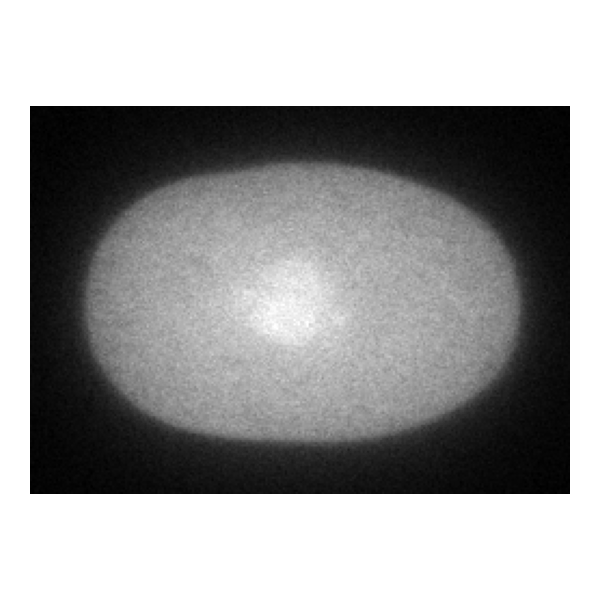

In [4]:
fig, ax = plt.subplots()
ax.imshow(rotated_embryo(imgs[0], rois[0], 250, 180, 3), cmap='gray', vmin=0, vmax=25000)
ax.axis('off')
fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs_cytbg/img.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


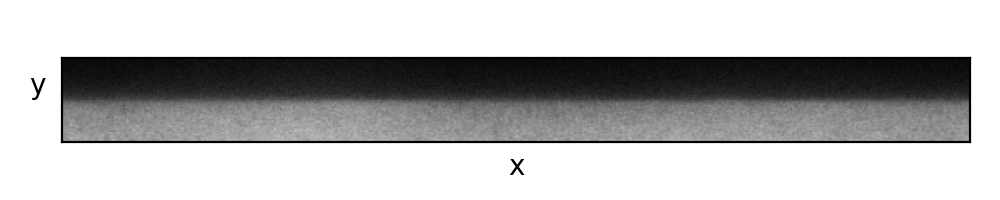

In [5]:
fig, ax = plt.subplots()
ax.imshow(imgs_straight_no_interp[0], cmap='gray', vmin=0, vmax=25000)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('x')
ax.set_ylabel('y   ', rotation=0)
fig.set_size_inches(5, 1)
fig.tight_layout()
fig.savefig('Figs_cytbg/straight.png', dpi=600, transparent=True)

### Straightened image

### Average profile

<IPython.core.display.Javascript object>


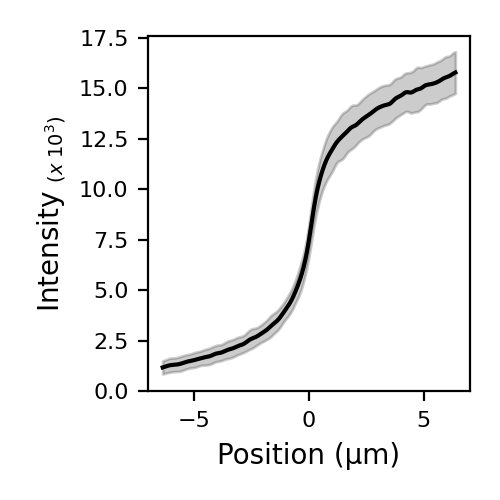

In [15]:
fig, ax = plt.subplots()
x = np.linspace(-25 * 0.255, 25 * 0.255, 500)
p_mean = np.mean(imgs_straight[0], axis=1) / 1000
p_std = np.std(imgs_straight[0], axis=1) / 1000
ax.plot(x, p_mean, c='k')
ax.fill_between(x, p_mean - p_std,  p_mean + p_std, color='k', alpha=0.2)
ax.set_ylim(bottom=0)
ax.set_xlabel('Position (μm)')
ax.set_ylabel('Intensity ' + r'$_{(x\;10^{3})}$')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(2.5,2.5)
fig.tight_layout()
fig.savefig('Figs_cytbg/profiles_intra_embryo.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


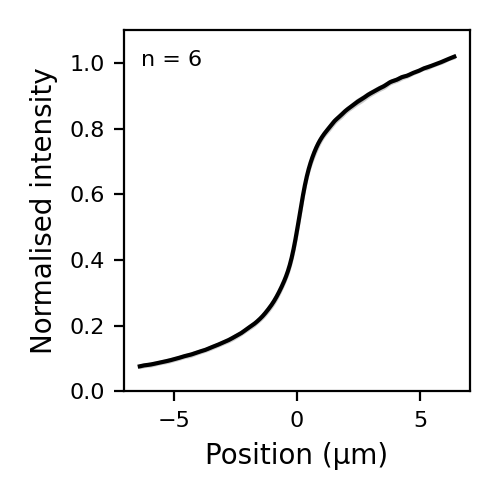

In [13]:
fig, ax = plt.subplots()
x = np.linspace(-25 * 0.255, 25 * 0.255, 500)
ax.plot(x, mean_profile, c='k')
ax.fill_between(x, mean_profile - std_profile,  mean_profile + std_profile, color='k', alpha=0.2)
ax.set_ylim(0, 1.1)
ax.set_xlabel('Position (μm)')
ax.set_ylabel('Normalised intensity')
ax.tick_params(axis='both', labelsize=8)
ax.text(s='n = 6', x=0.05, y=0.9, transform=ax.transAxes, fontsize=8)
fig.set_size_inches(2.5,2.5)
fig.tight_layout()
fig.savefig('Figs_cytbg/profiles.png', dpi=600, transparent=True)

### Polar vs midcell

In [8]:
# profiles_ant = [bounded_mean_2d(s, [0.4, 0.6]) for s in imgs_straight]
# profiles_norm_ant = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles_ant]
# mean_profile_ant = np.mean(np.array(profiles_norm_ant), axis=0)
# std_profile_ant = np.std(np.array(profiles_norm_ant), axis=0)

# profiles_post = [bounded_mean_2d(s, [0.9, 0.1]) for s in imgs_straight]
# profiles_norm_post = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles_post]
# mean_profile_post = np.mean(np.array(profiles_norm_post), axis=0)
# std_profile_post = np.std(np.array(profiles_norm_post), axis=0)

In [9]:
# fig, ax = plt.subplots()
# x = np.linspace(-25 * 0.255, 25 * 0.255, 500)
# ax.plot(x, mean_profile_ant, c='c')
# ax.fill_between(x, mean_profile_ant - std_profile_ant,  mean_profile_ant + std_profile_ant, color='c', alpha=0.2)
# ax.plot(x, mean_profile_post, c='m')
# ax.fill_between(x, mean_profile_post - std_profile_post,  mean_profile_post + std_profile_post, color='m', alpha=0.2)
# ax.set_ylim(0, 1.1)
# ax.set_xlabel('Position (μm)')
# ax.set_ylabel('Normalised intensity')
# fig.set_size_inches(3,3)
# fig.tight_layout()